In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
%matplotlib inline

In [2]:
def T(phi0):
    return 4*ellipk(np.sin(phi0/2)**2)

#sqrt(l/g) = 1 because normalized
#Assumption: rigid, massless string
#ellipjto avoid divergence, and ellipk is for complete elliptic integral

Text(0, 0.5, 'T (In terms of $\\pi$)')

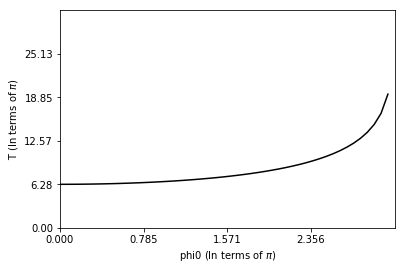

In [3]:
phis = np.linspace(0,np.pi) #create random numbers from 0 to pi
ts = T(phis) #solve for individual time for each phis
plt.plot(phis,ts, 'k') #plot plots
plt.xticks(np.arange(0,np.pi,np.pi/4))
plt.yticks(np.arange(0,10*np.pi,2*np.pi))
plt.xlim(0,np.pi)
plt.ylim(0,10*np.pi)
plt.xlabel("phi0 (In terms of $\pi$)")
plt.ylabel("T (In terms of $\pi$)")

#plt.ylim(0,30) #set range of time from 0 to 30

In [4]:
#def psi(t, phi0):
#    return ellipj(t, np.sin(phi0/2) ** 2)[3] #get the fourth element of the lsit

In [5]:
def sinepsi(t, phi0):
    return ellipj(t, np.sin(phi0/2) ** 2)[0] #get the first element of the lists

#normalize because nonlinearity is only needed
def phinorm(x, phi0):
    return 2*np.arcsin(np.sin(phi0/2) * sinepsi(x*T(phi0), phi0))/phi0

In [6]:
phi0 = [0.1*np.pi, 0.8*np.pi, 0.95*np.pi, 0.99*np.pi, 0.999*np.pi]
x = np.linspace(0,1,100)

#other form of defining a function
flist = [lambda x: phinorm(x, phi0[i]) for i in range(5)]
fist = np.array(flist)#not needed

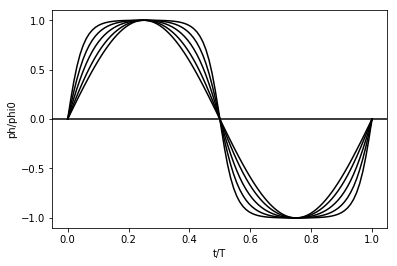

In [7]:
for i in range(5):
    plt.plot(x, phinorm(x, phi0[i]), 'black')


plt.xlabel('t/T')
plt.ylabel('ph/phi0')
plt.yticks(np.linspace(-1,1,5))
plt.xticks(np.linspace(0,1,6))
plt.axhline(0,color='black')
plt.show()

Text(0, 0.5, 'Abs[b(s)]')

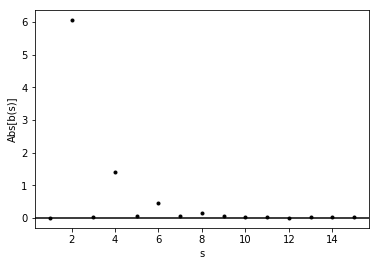

In [9]:
X = phinorm(x, phi0[4])
XX = np.abs(np.fft.fft(X)/np.sqrt(len(X)))

s = np.linspace(1,15,15)

plt.plot(s, XX[:15], 'k.')
plt.axhline(0,color='black')
plt.xlabel("s")
plt.ylabel("Abs[b(s)]")

In [9]:
def E(phidot, phi):
    return (phidot**2)/2 - np.cos(phi)

In [13]:
phidot = np.linspace(-3,3)
phi = np.linspace(-np.pi,np.pi)
#X,Y = np.meshgrid(phi, phidot)
z = E(Y,X)

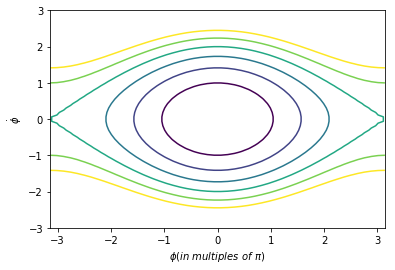

In [14]:
plt.contour(phi, phidot, z, levels=[-0.5,0,0.5,1.0,1.5,2.0]) #or you can use phi/np.pi
plt.xlabel("$ \phi(in\ multiples\ of\ \pi)$")
plt.ylabel("$ \dot{\phi}$")
plt.show()
#ideal angle is pi/4